# Volume 1: K-Means Clustering.
    <Tyler Humpherys>
    <Math 345>
    <10/12/21>

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
%matplotlib inline

In [3]:
plt.rcParams["figure.dpi"] = 200

## Problem 1

Write a `KMeans` class for doing basic $k$-means clustering.
Implement the following methods, following `sklearn` class conventions.
1. `__init__()`: Accept a number of clusters $k$, a maximum number of iterations, and a convergence tolerance.
Store these as attributes.

2. `fit()`: Accept an $m \times n$ matrix $X$ of $m$ data points with $n$ features.
Choose $k$ random rows of $X$ as the initial cluster centers.
Run the $k$-means iteration until consecutive centers are within the convergence tolerance, or until iterating the maximum number of times.
Save the cluster centers as attributes.
If a cluster is empty, reassign the cluster center as a random row of $X$.
Return `self` after completing this process.

3. `predict()`: Accept an $l \times n$ matrix $X$ of data.
Return an array of $l$ integers where the $i$th entry indicates which cluster center the $i$th row of $X$ is closest to.

Test your class on the iris data set (`sklean.datasets.load_iris()`) after reducing the data to two principal components (with `sklearn.decomposition.PCA`).
Plot the data, coloring by cluster. It should look similar to the graphs in the lab.

In [4]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-5, p=2, normalize=False):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
            p (float): The norm to use
            normalize (bool): Whether to normalize the centers at each step
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.p = p
        self.normalize = normalize
    
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        self.centers = {}

        #initialize the centers, pick k points arbirarily from the available points
        for i in range(self.n_clusters):
            self.centers[i] = X[np.random.randint(0, X.shape[0] - 1)]

        #begin iterations
        for i in range(self.max_iter):
            self.classes = {}
            for i in range(self.n_clusters):
                self.classes[i] = []

            #find the distance between the point and cluster; choose the nearest center, then add that point to the cluster
            for features in X:
                distances = [np.linalg.norm(features - self.centers[center], ord=self.p) for center in self.centers]
                cluster_classification = distances.index(min(distances))
                self.classes[cluster_classification].append(features)

            previous_centers = dict(self.centers)

            #average the cluster datapoints to re-calculate the centers
            for cluster_class in self.classes:
                if len(self.classes[cluster_class]) == 0:
                    self.centers[cluster_class] = X[np.random.randint(0, X.shape[0] - 1)]
                else:
                    avg_value = np.average(self.classes[cluster_class], axis = 0)
                    if self.normalize == True:
                        norm = np.linalg.norm(avg_value, ord=self.p)
                        self.centers[cluster_class] = avg_value/norm
                    else:
                        self.centers[cluster_class] = avg_value
                

            #check to see if the centers have moved less than the tolerence
            isOptimal = True
            list_norms = []
            
            for center in self.centers:
                old_cluster = previous_centers[center]
                current_cluster = self.centers[center]
                list_norms.append(np.linalg.norm((old_cluster - current_cluster), ord=self.p))
                
                if max(list_norms) > self.tol:
                    isOptimal = False

            #break out of the main loop if the results are optimal, ie. the centers don't change their positions much(more than our tolerance)
            if isOptimal:
                break
        return self
    
    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters-1 for each entry of X.
        """
        distances = [np.linalg.norm(features - self.centers[center], ord=self.p) for center in self.centers]
        cluster_classification = distances.index(min(distances))
        return cluster_classification
    
    def fit_predict(self, X, y=None):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        return self.fit(X).predict(X)

In [5]:
#run this cell to get the iris data
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = PCA(n_components=2).fit_transform(iris.data)

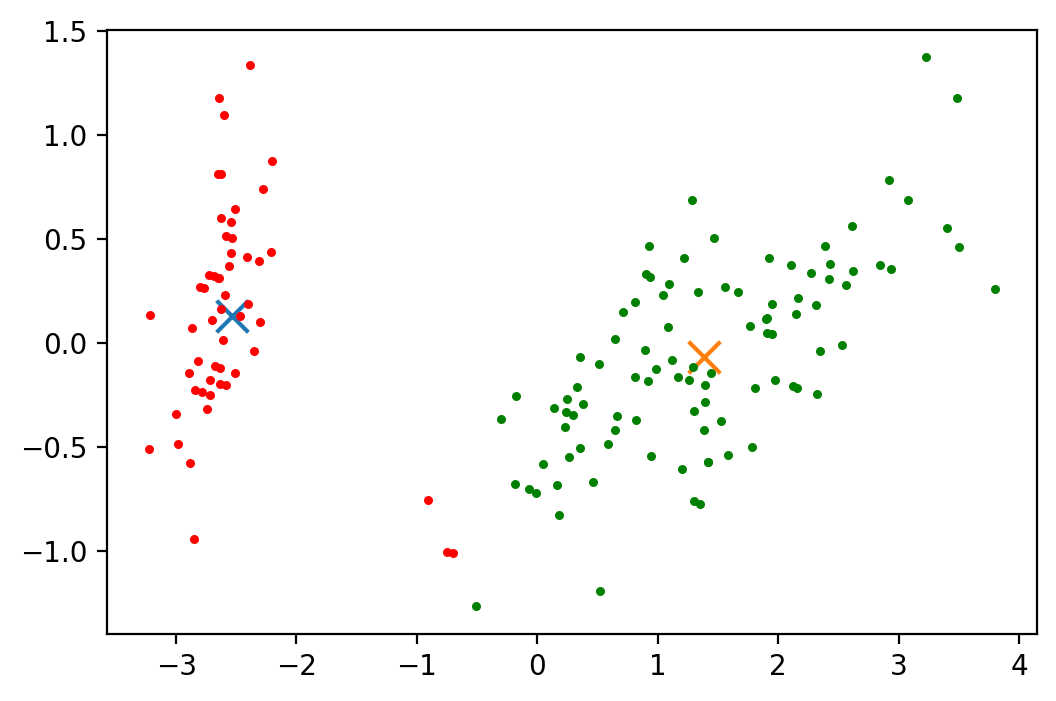

In [10]:
#initialize K-means class
km = KMeans(2)
#fit the iris data (in this case break into 2 clusters)
km.fit(iris_data)

# Plotting starts here
colors = 10*["r", "g", "c", "b", "k", "m", "y", "tab:blue", "tab:orange", 
             "tab:green", "tab:red", "tab:purple", "tab:pink", "tab:brown"]

# Plot the cluster centers
for center in km.centers:
    plt.scatter(km.centers[center][0], km.centers[center][1], s = 130, marker = "x")

#plot the clusters (color, appropriately)
for center in km.classes:
    color = colors[center]
    for features in km.classes[center]:
        plt.scatter(features[0], features[1], color = color, s = 5)
plt.show()

## Problem 2

Modify `KMeansfit()` to take in a paramter `p` which gives us the norm to be used. 

Import and parse the Sacramento housing data.
1. Use your `KMeans` class with a chosen `norm` on the housing data, let n=12.
2. Experiment with different norms.
3. Plot the data, coloring by cluster.
Also mark the cluster centers.
In a Markdown cell explain which norm is best for decreasing the longest distance to farthest home.

In [9]:
sacramento_data = np.load('sacramento.npy')[:,-2:]


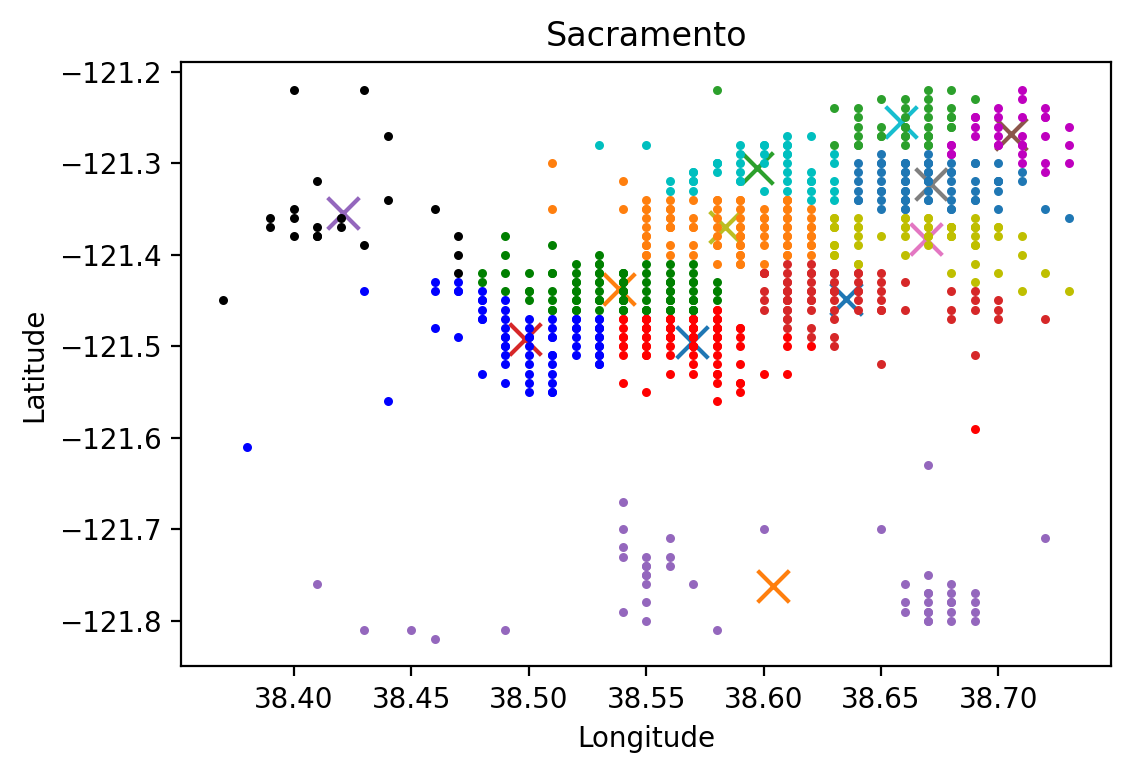

In [12]:
#initialize K-means class
km = KMeans(n_clusters=12, p=7)
#fit the sacramento data (in this case break into 12 clusters)
km.fit_predict(sacramento_data)

# Plotting starts here
colors = 10*["r", "g", "c", "b", "k", "m", "y", "tab:blue", "tab:orange", 
             "tab:green", "tab:red", "tab:purple", "tab:pink", "tab:brown"]

# Plot the cluster centers
for center in km.centers:
    plt.scatter(km.centers[center][-2], km.centers[center][-1], s = 130, marker = "x")

#plot the clusters (color, appropriately)
for center in km.classes:
    color = colors[center]
    for features in km.classes[center]:
        plt.scatter(features[-2], features[-1], color = color, s = 5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sacramento")
plt.show()

After trying a ton of different p values I think the 7 norm works the best to minimize the furthest distance

## Problem 3

Modify `KMeans.fit()` so that if `normalize` is `True`, the cluster centers are normalized at each iteration.

Cluster the earthquake data in three dimensions by converting the data from spherical coordinates to euclidean coordinates on the sphere.
1. Convert longitude and latitude to radians, then to spherical coordinates.
(Hint: `np.deg2rad()` may be helpful.)
2. Convert the spherical coordinates to euclidean coordinates in $\mathbb{R}^3$.
3. Use your `KMeans` class with normalization to cluster the euclidean coordinates.
4. Translate the cluster center coordinates back to spherical coordinates, then to degrees.
5. Plot the data, coloring by cluster.
Also mark the cluster centers.

In [12]:
data = np.load('earthquake_coordinates.npy')
transfCoordinates = []
for point in data:
    #Transform each longitude & latitude value to radians and then spherical coordinates
    point[0] = (np.deg2rad(point[0]))
    point[1] = ((np.pi/2) - np.deg2rad(point[1]))
    #Now convert to euclidean coordinates
    x = np.sin(point[1])*np.cos(point[0])
    y = np.sin(point[1])*np.sin(point[0])
    z = np.cos(point[1])
    transfCoordinates.append([x, y, z])

#initialize K-means class
km = KMeans(15, normalize=True)
#fit the data (in this case break into 3 clusters)
km.fit(np.array(transfCoordinates))

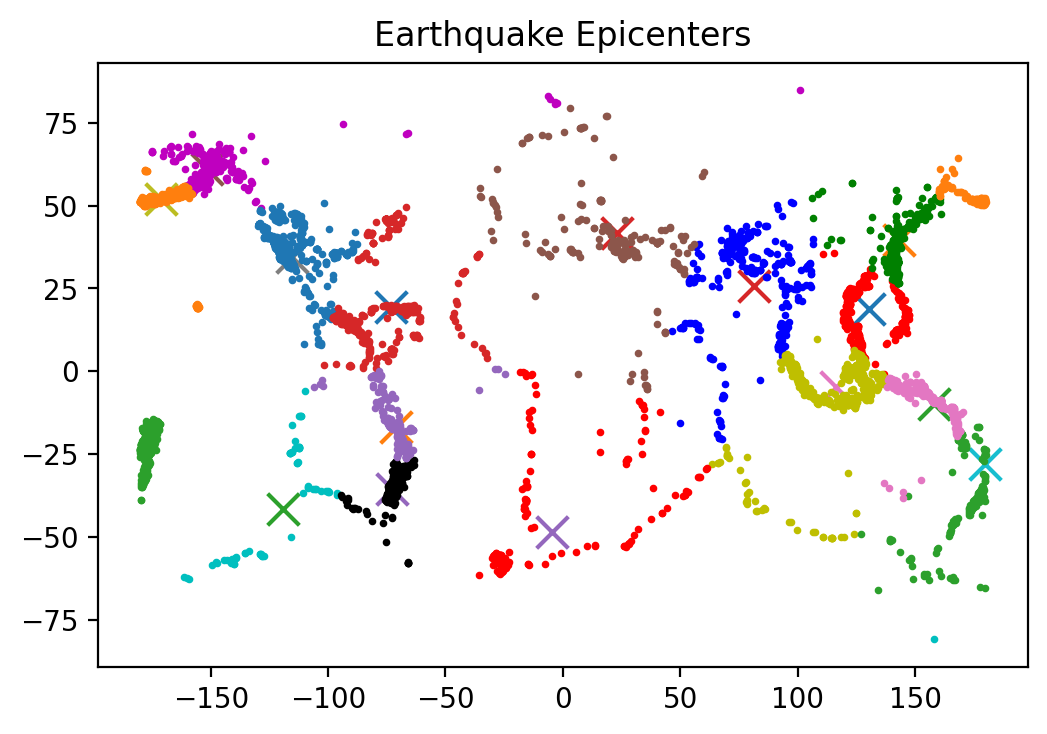

In [32]:
#Convert back to latitude and longitude   
f = lambda x, y: np.rad2deg(np.arctan2(y, x))
g = lambda z: 90 - (np.rad2deg(np.arccos(z)))
# Plotting starts here
colors = 10*["r", "g", "c", "b", "k", "m", "y", "tab:blue", "tab:orange", 
             "tab:green", "tab:red", "tab:purple", "tab:pink", "tab:brown"]

# Plot the cluster centers
for center in km.centers:
    plt.scatter(f(km.centers[center][0], km.centers[center][1]), g(km.centers[center][2]), s = 130, marker = "x")

#plot the clusters (color, appropriately)
for class_cluster in km.classes:
    color = colors[class_cluster]
    for features in km.classes[class_cluster]:
        plt.scatter(f(features[0], features[1]), g(features[2]), color = color, s = 3)
plt.title("Earthquake Epicenters")
plt.show()

## Problem 4

Write a function that accepts an image array (of shape $(m,n,3)$), an integer number of clusters $k$, and an integer number of samples $S$.
Reshape the image so that each row represents a single pixel.
Choose $S$ pixels to train a $k$-means model on with $k$ clusters.
Make a copy of the original picture where each pixel has the same color as its cluster center.
Return the new image.
For this problem, you may use `sklearn.cluster.KMeans` instead of your `KMeans` class.

Test your function on some of the provided NASA images.

In [ ]:
def quantize_image(im, n_clusters=4, n_samples=50):
    """Cluster the pixels of the image 'im' by color.
    Return a copy of the image where each pixel is replaced by the value
    of its cluster center.
    
    Parameters:
        im ((m,n,3) ndarray): an image array.
        n_clusters (int): the number of k-means clusters.
        n_samples (int): the number of pixels to train the k-means model on.
    
    Returns:
        ((m,n,3) ndarray): the quantized image.
    """
    raise NotImplementedError("Problem 4 Incomplete")